In [1]:
#The goal of this notebook is to analyse the data collected in Madrid that was used for the paper of Jelena 
#"Social experiments in the mesoscale: Humans playing a spatial Prisoner's Dilemma" PLoS ONE (in print)
#The data originally was given in a HEX format, meaning that the data has to be converted
#Extensive data cleaning and formatting ahead.


#In the experiment, volunteers played a 2x2 PD game with each of their eight neighbors (Moore neighborhood) taking only one action, either to cooperate (C) or to defect (D), the action being the same against all the opponents.

#Two experiment were conducted and the results were stored as series of Cs and Ds, separately for each of 169 users. These result were then compressed using hexadecimal notation. We coded any C as 1 and any D as 0. For instance, if someone played (only 12 rounds) CCDCCDCDDDCD will be, in binary notation, 110110100010 and in hexadecimal DA2. As the number of rounds are 47 and 58, therefore we added 1 and 2 zeros respectively at the end of the binary number, so as to make the number of binary digits a multiple of 4 and thus converted into hexadecimal straight away. 

#The other information needed to be stored are the positions of the players. This we stored as a position in the list. First hexadecimal number are the actions of the player on the position (1,1) in the lattice, the second is of the player on the position (1,2), the 14th number is of the player on the position (2,1) etc.

#Therefore, there are two files data_exp1.txt and data_exp2.txt with the actions of the players in the first experiment and second experiment respectively. Each contains the list of hexadecimal numbers with each number being the actions of the players and the positions in the list representing the position in the lattice. 
import pandas as pd
import hddm
import csv
import matplotlib.pyplot as plt
import HDDMmodelMaker as ddm
import time

/Users/eladiomontero/opt/anaconda3/envs/decTimesEnv/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
def hexToBin(hex_num):
    hexTobin_map = {
        "0":"0000",
        "1":"0001",
        "2":"0010",
        "3":"0011",
        "4":"0100",
        "5":"0101",
        "6":"0110",    
        "7":"0111",
        "8":"1000",
        "9":"1001",
        "A":"1010",
        "B":"1011",
        "C":"1100",
        "D":"1101",
        "E":"1110",
        "F":"1111",
    }
    return "".join(hexTobin_map[i] for i in hex_num)

In [3]:
def readFiles(url):
    for u in url:
        count = 0
        with open(u) as f:
            for line in f:
                hexToBin(line.strip())
                count += 1
        print count

In [4]:
readFiles(["./raw data/data_exp1.txt", "./raw data/data_exp2.txt", "./raw data/control/data_control.txt"])

169
169
169


In [5]:
reDict = {'D':0.,'C':1.}

def loadData():

	"""EXP1""" #with context
	#Load original file
	data = []
	with open('./raw data/times_exp1_rand.dat', 'r') as csvfile:
		csvreader = csv.reader(csvfile, delimiter=',')
		for row in csvreader:
			data.append((row[0],row[1],row[3],row[5],row[6].strip(),row[2]))
	#Create a file formatted for hddm
	with open('times_exp1_rand_hddm.csv', 'w') as outFile:
		outFile.write('userid,rt,response,round,context,strategy\n')
		for i in range(len(data)):
			d = data[i]
			action = reDict[d[1].strip()]
			roundN = int(d[2])
			if roundN > 1:
				context = contextNext #context is that of the previous round
			else:
				context = float('nan');
			contextNext = float(d[3])
			rt = float(d[0])/1000 #seconds
			if rt > 0 and rt< 30:
				outFile.write('%3d,%5.2f,%2.0f,%2d,%2.0f,%s\n'%(int(d[5]),rt,action,roundN,context,d[4]))
	#Load hddm format
	data1 = hddm.load_csv('times_exp1_rand_hddm.csv')
	data1 = hddm.utils.flip_errors(data1)

	"""CONTROL"""
	#Load original file
	data = []
	with open('./raw data/times_control_users.dat', 'r') as csvfile:
		csvreader = csv.reader(csvfile, delimiter=',')
		for row in csvreader:
			data.append((row[0],row[1],row[3],row[2]))
	#Create a file formatted for hddm
	with open('times_expC_rand_hddm.csv', 'w') as outFile:
		outFile.write('userid,rt,response,round\n')
		for d in data:
			rt = float(d[0])/1000; #seconds
			if rt > 0 and rt< 30:
				outFile.write('%3d,%8.6f,%5.3f,%2d\n'%(int(d[3]),rt,reDict[d[1].strip()],int(d[2])))
	#Load hddm format
	dataC = hddm.load_csv('times_expC_rand_hddm.csv')
	dataC = hddm.utils.flip_errors(dataC)

	"""EXP 2""" #with context
	#Load original file
	data = []
	with open('./raw data/times_exp2_rand.dat', 'r') as csvfile:
		csvreader = csv.reader(csvfile, delimiter=',')
		for row in csvreader:
			data.append((row[0],row[1],row[3],row[5],row[6].strip(),row[2]))
	#Create a file formatted for hddm
	with open('times_exp2_rand_hddm.csv', 'w') as outFile:
		outFile.write('userid,rt,response,round,context,strategy\n')
		for i in range(len(data)):
			d = data[i]
			action = reDict[d[1].strip()]
			roundN = int(d[2])
			if roundN > 1:
				context = contextNext #context is that of the previous round
			else:
				context = float('nan');
			contextNext = float(d[3])
			rt = float(d[0])/1000; #seconds
			if rt > 0 and rt< 30:
				outFile.write('%3d,%5.2f,%2.0f,%2d,%2.0f,%s\n'%(int(d[5]),rt,action,roundN,context,d[4]))
	#Load hddm format
	data2 = hddm.load_csv('times_exp2_rand_hddm.csv')
	data2 = hddm.utils.flip_errors(data2)

	"""PAIRWISE RECIPROCITY"""
	#Load original file
	data = []
	with open('./raw data/weakPD.dat', 'r') as csvfile:
		csvreader = csv.reader(csvfile, delimiter=' ')
		for row in csvreader:
			data.append((row[0],row[1],row[3],row[2]))
	#Create a file formatted for hddm
	with open('times_expW_rand_hddm.csv', 'w') as outFile:
		outFile.write('userid,rt,response,round\n')
		for d in data:
			rt = float(d[0])/1000; #seconds
			if rt > 0 and rt< 30:
				outFile.write('%2d,%8.6f,%5.3f,%2d\n'%(int(d[3]),rt,reDict[d[1].strip()],int(d[2])))
	#Load hddm format
	dataW = hddm.load_csv('times_expW_rand_hddm.csv')
	dataW = hddm.utils.flip_errors(dataW)

	return (data1,dataC,data2,dataW)

In [6]:
data1,dataC,data2,dataW = loadData()

In [7]:
data1.strategy.unique()

#Pure defectors: PD
#Pure cooperators: PC
#Moody conditional cooperators: MCC

array(['MCC', 'PD', 'PC'], dtype=object)

In [8]:
 
data1['response'].value_counts()

0    5637
1    2266
Name: response, dtype: int64

In [9]:
data2['response'].value_counts()

0    7480
1    2225
Name: response, dtype: int64

In [10]:
dataW['response'].value_counts()

1.0    1598
0.0     201
Name: response, dtype: int64

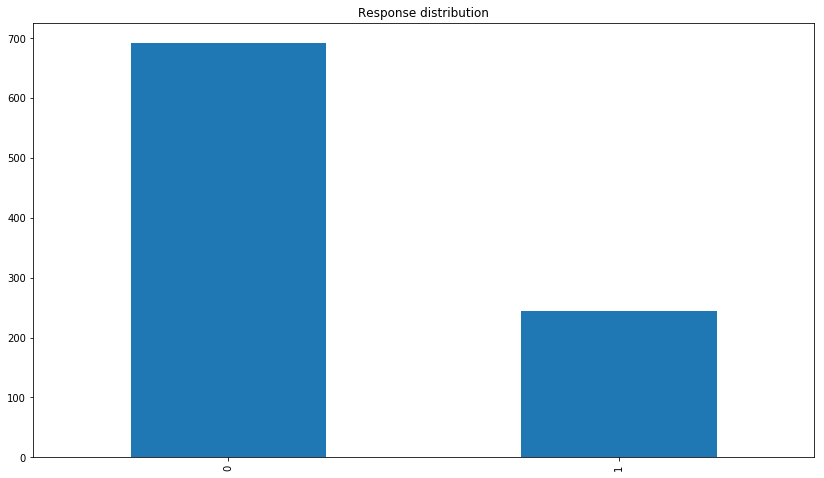

In [11]:
#Analysis per context 
no_coop = data1.loc[data1.context == 4]
no_coop

no_coop['response'].value_counts().plot(kind = "bar", figsize =(14, 8), title = "Response distribution")

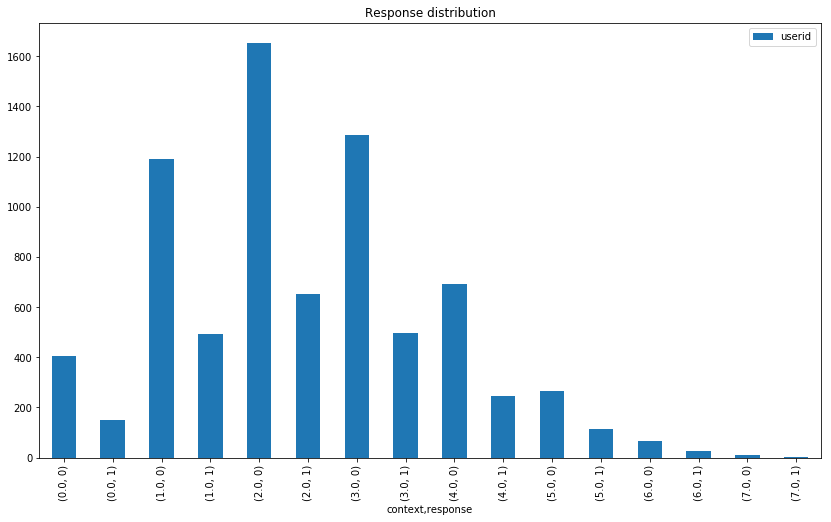

In [12]:
data1[['context', 'response', 'userid']].groupby(['context', 'response']).agg("count").plot(kind = "bar", figsize = (14,8), title = "Response distribution")

In [13]:
def roundModelGroup (data, column, window):
    groups = list(data[column].unique())
    modeler = ddm.HDDMmodelMaker()
    st = time.time()
    rounds = range(1, 48)
    roundsDf = pd.DataFrame()
    data["round"]  = pd.to_numeric(data["round"])
    for g in groups:
        df = data.loc[data[column]==g]
        first = True
        for r in df["round"].unique():
            try:
                model = modeler.fit_model(df.loc[(df["round"] == r)], 5000, 200)
                print("\nModel: %s, round %d, time: %f\n" % (g, r, time.time() - st))
                modStats = modeler.get_stats(model)
                modStats["round"] = r
                if first:
                    roundsDf = modStats
                    first = False
                else:
                    roundsDf = roundsDf.append(modStats, ignore_index = True)
                if r%10 == 0:
                    roundsDf.to_csv("./output/%s_rounds.csv" % (g))
            except: continue
        roundsDf.to_csv("./output/%s_rounds.csv" % (g))

In [14]:
len(data1.loc[data1.context==0]["round"].unique())

44

In [15]:
def roundModel (data, window=0):
    modeler = ddm.HDDMmodelMaker()
    st = time.time()
    rounds = range(1, 48)
    roundsDf = pd.DataFrame()
    df = data
    for r in rounds:
        try:
            model = modeler.fit_model(df.loc[df["round"] == r], 1000, 500)
            print("\nRound %d, time: %f\n" % (r, time.time() - st))
            modStats = modeler.get_stats(model)
            modStats["round"] = r
            if r == 0:
                roundsDf = modStats
            else:
                roundsDf = roundsDf.append(modStats, ignore_index = True)
            if r%1 == 0:
                roundsDf.to_csv("./output/all_rounds.csv")
        except: break
        roundsDf.to_csv("./output/all_rounds.csv")

In [16]:
data1.context.value_counts()

2.0    2303
3.0    1781
1.0    1684
4.0     935
0.0     554
5.0     378
6.0      90
7.0      12
Name: context, dtype: int64

In [127]:
roundModel(data1)

 [-----------------100%-----------------] 1001 of 1000 complete in 1278.0 sec
Round 1, time: 1288.675272

 [-----------------100%-----------------] 1001 of 1000 complete in 687.3 sec
Round 2, time: 1992.953114

 [-----------------100%-----------------] 1001 of 1000 complete in 1093.3 sec
Round 3, time: 3103.470151

 [-----------------100%-----------------] 1001 of 1000 complete in 794.4 sec
Round 4, time: 3910.683463

 [-----------------100%-----------------] 1001 of 1000 complete in 556.9 sec
Round 5, time: 4481.921601

 [-----------------100%-----------------] 1000 of 1000 complete in 772.9 sec
Round 6, time: 5271.325033

 [-----------------100%-----------------] 1000 of 1000 complete in 479.7 sec
Round 7, time: 5764.801125

 [-----------------100%-----------------] 1001 of 1000 complete in 21726.1 sec
Round 8, time: 27518.171761

 [-----------------100%-----------------] 1000 of 1000 complete in 13371.0 sec
Round 9, time: 44104.508760

 [-----------------100%-----------------] 1001 

In [148]:
roundModelGroup(data1, "context", 0)

 [-----------------100%-----------------] 5000 of 5000 complete in 14.6 sec
Model: 4.0, round 2, time: 14.686721

 [-----------------100%-----------------] 5000 of 5000 complete in 13.8 sec
Model: 4.0, round 5, time: 28.929218

 [-----------------100%-----------------] 5000 of 5000 complete in 9.6 sec
Model: 4.0, round 7, time: 38.734539

 [-----------------100%-----------------] 5000 of 5000 complete in 12.4 sec
Model: 4.0, round 9, time: 51.352920

 [-----------------100%-----------------] 5000 of 5000 complete in 9.6 sec
Model: 4.0, round 10, time: 61.184437

 [-----------------100%-----------------] 5000 of 5000 complete in 12.4 sec
Model: 4.0, round 11, time: 73.870359

 [-----------------100%-----------------] 5000 of 5000 complete in 13.0 sec
Model: 4.0, round 17, time: 87.144668

 [-----------------100%-----------------] 5000 of 5000 complete in 13.4 sec
Model: 4.0, round 19, time: 100.757017

 [-----------------100%-----------------] 5000 of 5000 complete in 11.9 sec
Model: 4.

 [-----------------100%-----------------] 5000 of 5000 complete in 13.3 sec
Model: 3.0, round 18, time: 827.800002

 [-----------------100%-----------------] 5000 of 5000 complete in 11.2 sec
Model: 3.0, round 21, time: 839.215025

 [-----------------100%-----------------] 5000 of 5000 complete in 10.7 sec
Model: 3.0, round 34, time: 850.142349

 [-----------------100%-----------------] 5000 of 5000 complete in 10.6 sec
Model: 3.0, round 43, time: 860.956072

 [-----------------100%-----------------] 5000 of 5000 complete in 11.5 sec
Model: 3.0, round 9, time: 872.656708

 [-----------------100%-----------------] 5000 of 5000 complete in 8.4 sec
Model: 3.0, round 31, time: 881.253834

 [-----------------100%-----------------] 5000 of 5000 complete in 13.9 sec
Model: 3.0, round 5, time: 895.351564

 [-----------------100%-----------------] 5000 of 5000 complete in 13.7 sec
Model: 3.0, round 37, time: 909.277514

 [-----------------100%-----------------] 5000 of 5000 complete in 12.4 sec

 [-----------------100%-----------------] 5000 of 5000 complete in 10.4 sec
Model: 0.0, round 6, time: 2422.165733

 [-----------------100%-----------------] 5000 of 5000 complete in 12.2 sec
Model: 0.0, round 45, time: 2434.654555

 [-----------------100%-----------------] 5000 of 5000 complete in 10.3 sec
Model: 0.0, round 17, time: 2445.239989

 [-----------------100%-----------------] 5000 of 5000 complete in 10.6 sec
Model: 0.0, round 7, time: 2456.078023

 [-----------------100%-----------------] 5000 of 5000 complete in 10.4 sec
Model: 0.0, round 31, time: 2466.706138

 [-----------------100%-----------------] 5000 of 5000 complete in 10.5 sec
Model: 0.0, round 30, time: 2477.525422

 [-----------------100%-----------------] 5000 of 5000 complete in 12.1 sec
Model: 0.0, round 12, time: 2489.851871

 [-----------------100%-----------------] 5000 of 5000 complete in 10.7 sec
Model: 0.0, round 20, time: 2500.844791

 [-----------------100%-----------------] 5000 of 5000 complete in

In [128]:
data1.to_csv("madrid.csv")

# Analysis of actions
What do players do when their neighborhood cooperates at X rate?

In [36]:
#Do I look only at moody cooperators?
mcc = data1.loc[data1.strategy == "MCC"]
#mcc[['context', 'response', 'userid']].groupby(['context', 'response']).agg("count")


#g = data1.loc[data1.context == 6]
#g[['response', 'userid']].groupby(["response"]).agg("count").plot(kind = "bar", figsize = (14,8), title = "Response distribution")

In [55]:
#In general, I wanted to replicate the plots in the paper.
coop_rate = {}
for r in range(1, data1["round"].max() + 1):
    n = 0.0
    coop = 0.0
    for i, x in data1.loc[data1["round"] == r].iterrows():
        n += 1
        if x["response"] == 1.0:
            coop +=1
    coop_rate[r] = float(coop/n)
    

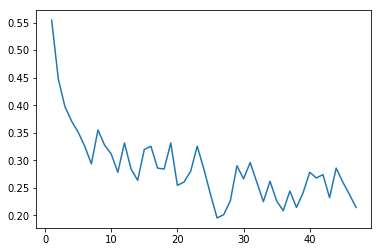

In [57]:
coop_rate
lists = sorted(coop_rate.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

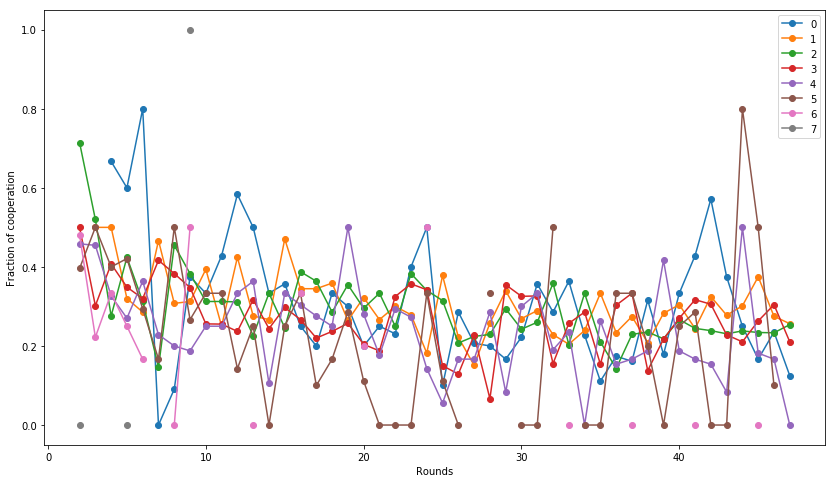

In [82]:
#Now by context
rounds = range(1, data1["round"].max() + 1) # rounds for plotting
plt.figure(figsize = (14,8))
contexts = [0,1,2,3,4,5,6,7]
for c in contexts:
    coop_rate = []
    for r in rounds:
        n = 0.0
        coop = 0.0
        for i, x in data1.loc[(data1["round"] == r) & (data1["context"] == c)].iterrows():
            n += 1
            if x["response"] == 1.0:
                coop +=1
        if n>1: coop_rate.append(float(coop/n))
        else: coop_rate.append(None)
    plt.plot(rounds, coop_rate,"-o", label = c)
plt.xlabel("Rounds")
plt.ylabel("Fraction of cooperation")
plt.legend(loc = "best")

In [112]:
#Focus on some cases:
#Players who cooperate when the context is bad 0 or 1 out of 8

users = data1.loc[(data1.context<=1) & (data1.response==1), ["userid", "round"]]
users.groupby('userid').agg("count").sort_values("round", ascending=False)

#Take the top more cooperative under those circumstances
coop_users = users.groupby('userid').agg("count").sort_values("round", ascending=False)[0:12]
coop_users["userid"] = coop_users.index

coop_df = data1.loc[data1.userid.isin(coop_users["userid"])]
coop_df["response"].value_counts()

#Around 0.71 cooperation rate.

1    402
0    160
Name: response, dtype: int64

In [119]:
#Cooperation rates of those users: most of them above 50%
for u in coop_users["userid"]:
    n = 0.0
    coop = 0.0
    for i, x in data1.loc[(data1["userid"] == u)].iterrows():
        n += 1
        if x["response"] == 1.0:
            coop +=1
    print ("User: %d, CR: %f" % (u, coop/n))

User: 168, CR: 0.851064
User: 40, CR: 0.851064
User: 75, CR: 1.000000
User: 149, CR: 0.531915
User: 146, CR: 0.744681
User: 28, CR: 0.488889
User: 119, CR: 0.553191
User: 32, CR: 0.723404
User: 155, CR: 0.893617
User: 134, CR: 0.531915
User: 123, CR: 0.702128
User: 111, CR: 0.702128


In [117]:
#When do this people decide to defect then? Also on low cooperation rates.
coop_df.loc[coop_df.response == 0].context.value_counts()

1.0    53
2.0    38
0.0    37
3.0    24
4.0     4
5.0     3
Name: context, dtype: int64

In [125]:
#Players who defect when the context is cooperative 6 or 7 out of 8

users = data1.loc[(data1.context>=6) & (data1.response==0), ["userid", "round"]]
users.groupby('userid').agg("count").sort_values("round", ascending=False)

#Take the top more cooperative under those circumstances
def_users = users.groupby('userid').agg("count").sort_values("round", ascending=False)[0:5]
def_users["userid"] = def_users.index

def_df = data1.loc[data1.userid.isin(def_users["userid"])]
def_df["response"].value_counts()
#Overall cooperation rate: 0.04

0    225
1     10
Name: response, dtype: int64

In [126]:
#People with low cooperation rates anyway
for u in def_users["userid"]:
    n = 0.0
    coop = 0.0
    for i, x in data1.loc[(data1["userid"] == u)].iterrows():
        n += 1
        if x["response"] == 1.0:
            coop +=1
    print ("User: %d, CR: %f" % (u, coop/n))

User: 1, CR: 0.106383
User: 84, CR: 0.000000
User: 154, CR: 0.000000
User: 106, CR: 0.085106
User: 99, CR: 0.021277


In [127]:
#When do this people decide to cooperate then? 
def_df.loc[def_df.response == 1].context.value_counts()

2.0    3
5.0    2
3.0    2
4.0    2
1.0    1
Name: context, dtype: int64

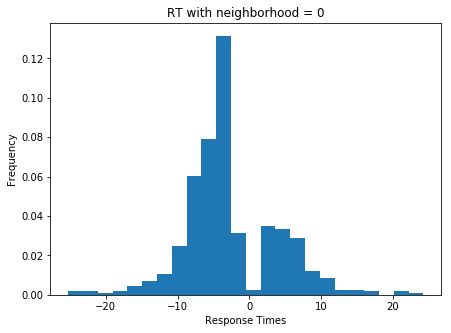

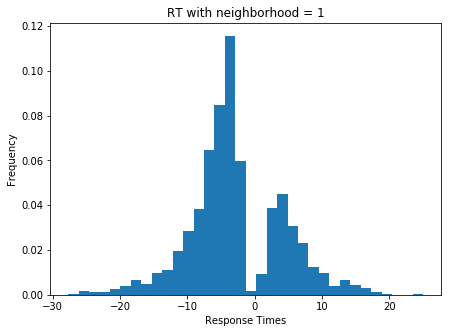

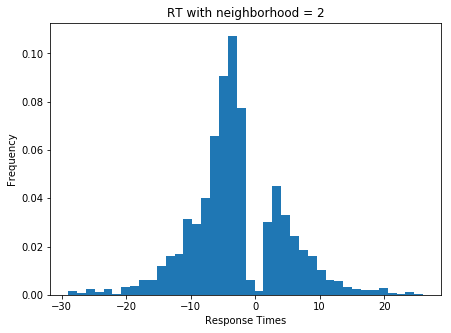

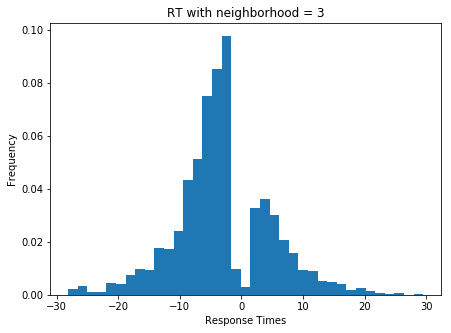

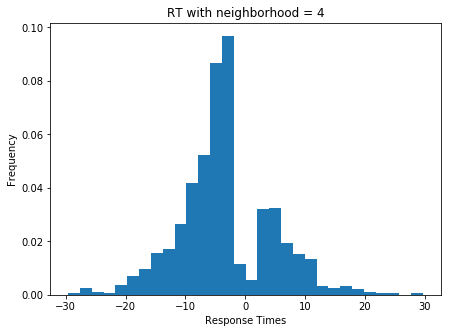

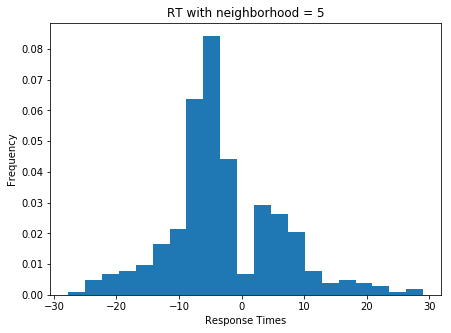

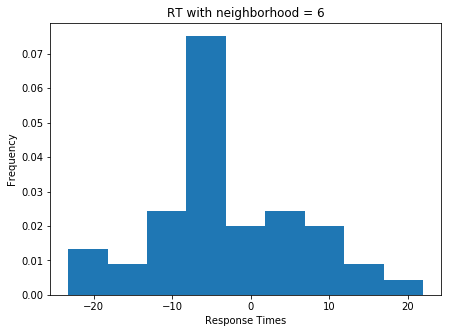

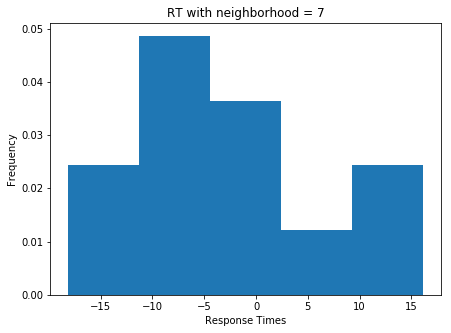

In [130]:
#Reaction times
for c in [0,1,2,3,4,5,6,7]:
    plt.figure(figsize = (7,5))
    plt.hist(data1.loc[data1.context == c].rt, density = True, bins = "auto")
    plt.xlabel("Response Times")
    plt.ylabel("Frequency")
    plt.title("RT with neighborhood = %d" % c)
    plt.show()

In [132]:
#Round analysis for each parameter of the DDM

In [18]:
def plot_rounds_context(groups, param, title, normalize = False):
    plt.figure(figsize = (14,10))
    for g in groups:
        data = pd.read_csv("./output/%s_rounds.csv" % (g))
        param_df = data.loc[(data.parameter == param), ["mean", "round"]]
        param_df = param_df.sort_values(by = "round")
        if normalize:
            if param == "v":
                param_df["mean"] = param_df["mean"].abs()
        plt.plot(param_df["round"],param_df["mean"], "-o", label = g)
    plt.xlabel("Rounds")
    plt.ylabel(param)
    plt.legend(loc = "best")
    plt.title(title)

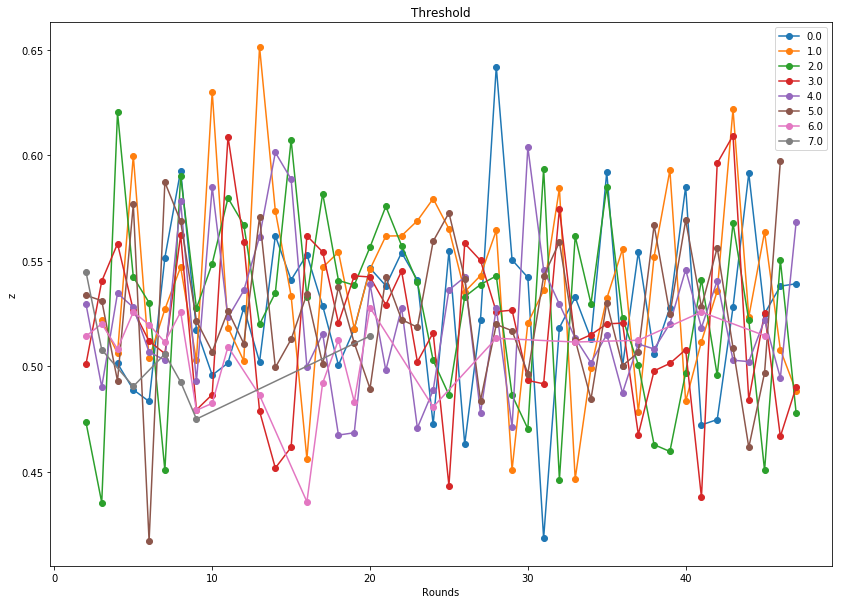

In [158]:
plot_rounds_context([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], "z", "Threshold")

In [159]:
#Grouped contexts: Low cooperation 0:2 Medium: 3:5 and High: 6 and 7
#This wat we can have more rounds per context and it's easier to interpret.

groups = [2,5,7]
modeler = ddm.HDDMmodelMaker()
st = time.time()
rounds = range(1, 48)
roundsDf = pd.DataFrame()
#data["round"]  = pd.to_numeric(data["round"])
for g in groups:
    df = data1.loc[data1["context"]<=g]
    first = True
    for r in df["round"].unique():
        try:
            model = modeler.fit_model(df.loc[(df["round"] == r)], 5000, 200)
            print("\nModel: %s, round %d, time: %f\n" % (g, r, time.time() - st))
            modStats = modeler.get_stats(model)
            modStats["round"] = r
            if first:
                roundsDf = modStats
                first = False
            else:
                roundsDf = roundsDf.append(modStats, ignore_index = True)
            if r%10 == 0:
                roundsDf.to_csv("./output/grouped_%s_rounds.csv" % (g))
        except: continue
    roundsDf.to_csv("./output/grouped_%s_rounds.csv" % (g))

 [-----------------100%-----------------] 5000 of 5000 complete in 13.1 sec
Model: 2, round 6, time: 13.225266

 [-----------------100%-----------------] 5000 of 5000 complete in 12.3 sec
Model: 2, round 12, time: 26.209872

 [-----------------100%-----------------] 5000 of 5000 complete in 7.2 sec
Model: 2, round 13, time: 33.728512

 [-----------------100%-----------------] 5000 of 5000 complete in 12.2 sec
Model: 2, round 18, time: 46.248546

 [-----------------100%-----------------] 5000 of 5000 complete in 11.3 sec
Model: 2, round 21, time: 57.843324

 [-----------------100%-----------------] 5000 of 5000 complete in 12.3 sec
Model: 2, round 22, time: 70.413477

 [-----------------100%-----------------] 5000 of 5000 complete in 11.8 sec
Model: 2, round 27, time: 82.504510

 [-----------------100%-----------------] 5000 of 5000 complete in 10.7 sec
Model: 2, round 28, time: 93.489781

 [-----------------100%-----------------] 5000 of 5000 complete in 10.9 sec
Model: 2, round 30, ti

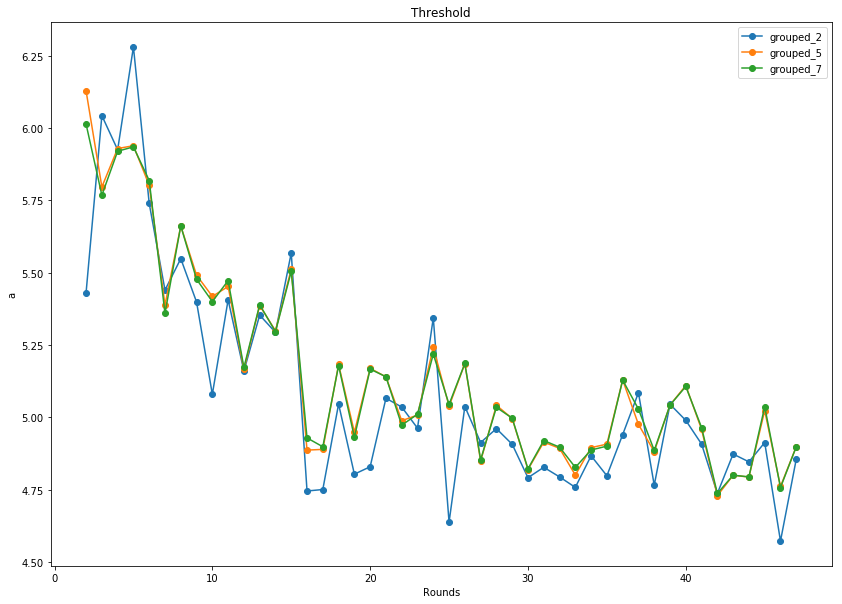

In [164]:
plot_rounds_context(["grouped_2","grouped_5","grouped_7"], "a", "Threshold")
#It seems like 5 and 7 are the same distribution

In [163]:
data1.context.value_counts()

2.0    2303
3.0    1781
1.0    1684
4.0     935
0.0     554
5.0     378
6.0      90
7.0      12
Name: context, dtype: int64

In [165]:
#Grouped contexts: Low cooperation 0:1 Medium: 2:3 and High: 4 to 7
#This wat we can have more rounds per context and it's easier to interpret.

groups = [1,3,7]
modeler = ddm.HDDMmodelMaker()
st = time.time()
rounds = range(1, 48)
roundsDf = pd.DataFrame()
#data["round"]  = pd.to_numeric(data["round"])
gPrev = -1
for g in groups:
    df = data1.loc[(data1["context"]<=g) & (data1["context"] > gPrev)]
    gPrev = g
    first = True
    for r in df["round"].unique():
        try:
            model = modeler.fit_model(df.loc[(df["round"] == r)], 5000, 200)
            print("\nModel: %s, round %d, time: %f\n" % (g, r, time.time() - st))
            modStats = modeler.get_stats(model)
            modStats["round"] = r
            if first:
                roundsDf = modStats
                first = False
            else:
                roundsDf = roundsDf.append(modStats, ignore_index = True)
            if r%10 == 0:
                roundsDf.to_csv("./output/grouped_%s_rounds.csv" % (g))
        except: continue
    roundsDf.to_csv("./output/grouped_%s_rounds.csv" % (g))

 [-----------------100%-----------------] 5000 of 5000 complete in 11.9 sec
Model: 1, round 6, time: 12.023272

 [-----------------100%-----------------] 5000 of 5000 complete in 6.2 sec
Model: 1, round 13, time: 18.583253

 [-----------------100%-----------------] 5000 of 5000 complete in 12.4 sec
Model: 1, round 18, time: 31.319122

 [-----------------100%-----------------] 5000 of 5000 complete in 9.9 sec
Model: 1, round 21, time: 41.521262

 [-----------------100%-----------------] 5000 of 5000 complete in 12.2 sec
Model: 1, round 22, time: 54.061852

 [-----------------100%-----------------] 5000 of 5000 complete in 7.2 sec
Model: 1, round 32, time: 61.585952

 [-----------------100%-----------------] 5000 of 5000 complete in 8.7 sec
Model: 1, round 36, time: 70.629488

 [-----------------100%-----------------] 5000 of 5000 complete in 12.7 sec
Model: 1, round 42, time: 83.619994

 [-----------------100%-----------------] 5000 of 5000 complete in 10.3 sec
Model: 1, round 43, time:

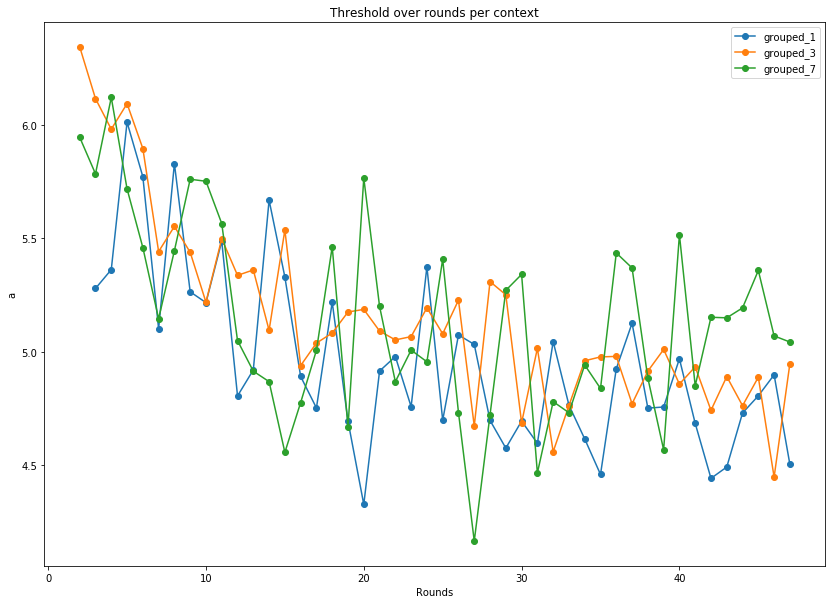

In [22]:
plot_rounds_context(["grouped_1","grouped_3","grouped_7"], "a", "Threshold over rounds per context")

Text(0.5,1,'Cooperation rate by context group')

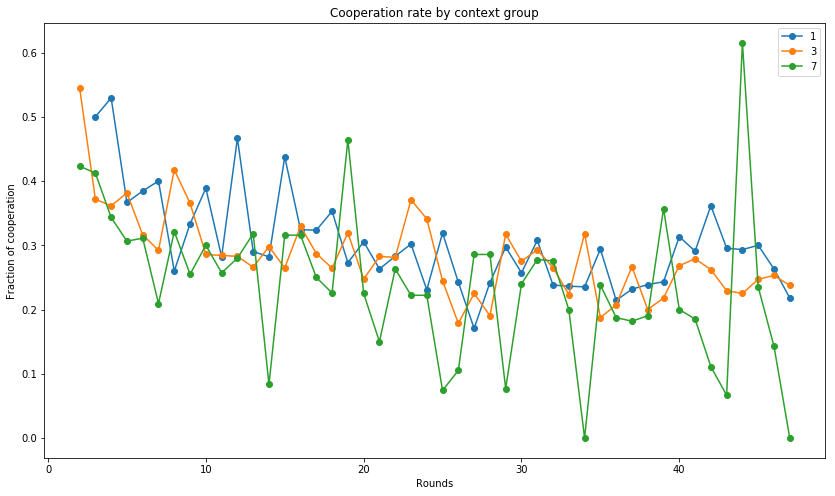

In [171]:
rounds = range(1, data1["round"].max() + 1) # rounds for plotting
plt.figure(figsize = (14,8))
contexts = [1,3,7]
cPrev = -1
for c in contexts:
    coop_rate = []
    for r in rounds:
        n = 0.0
        coop = 0.0
        for i, x in data1.loc[(data1["round"] == r) & (data1["context"] <= c) & (data1["context"] > cPrev)].iterrows():
            n += 1
            if x["response"] == 1.0:
                coop +=1
        if n>1: coop_rate.append(float(coop/n))
        else: coop_rate.append(None)
    cPrev = c
    plt.plot(rounds, coop_rate,"-o", label = c)
plt.xlabel("Rounds")
plt.ylabel("Fraction of cooperation")
plt.legend(loc = "best")
plt.title("Cooperation rate by context group")

In [176]:
#Now the same with the other dataset 

In [177]:
#In general, I wanted to replicate the plots in the paper.
coop_rate = {}
for r in range(1, data2["round"].max() + 1):
    n = 0.0
    coop = 0.0
    for i, x in data2.loc[data2["round"] == r].iterrows():
        n += 1
        if x["response"] == 1.0:
            coop +=1
    coop_rate[r] = float(coop/n)
    

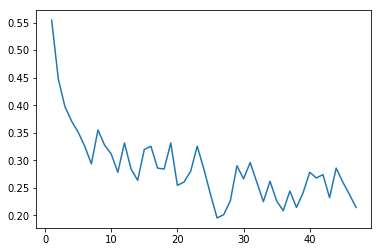

In [57]:
coop_rate
lists = sorted(coop_rate.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

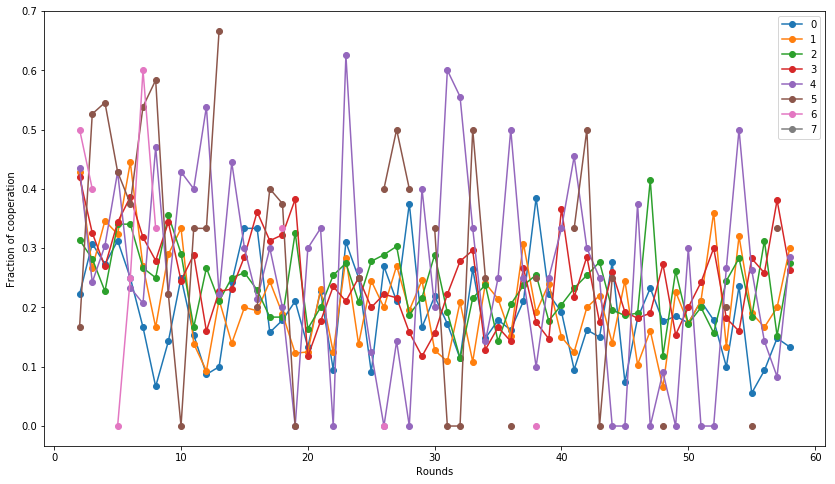

In [178]:
#Now by context
rounds = range(1, data2["round"].max() + 1) # rounds for plotting
plt.figure(figsize = (14,8))
contexts = [0,1,2,3,4,5,6,7]
for c in contexts:
    coop_rate = []
    for r in rounds:
        n = 0.0
        coop = 0.0
        for i, x in data2.loc[(data2["round"] == r) & (data2["context"] == c)].iterrows():
            n += 1
            if x["response"] == 1.0:
                coop +=1
        if n>1: coop_rate.append(float(coop/n))
        else: coop_rate.append(None)
    plt.plot(rounds, coop_rate,"-o", label = c)
plt.xlabel("Rounds")
plt.ylabel("Fraction of cooperation")
plt.legend(loc = "best")

In [182]:
#Focus on some cases:
#Players who cooperate when the context is bad 0 or 1 out of 8

users = data2.loc[(data2.context<=1) & (data2.response==1), ["userid", "round"]]
print(users.groupby('userid').agg("count").sort_values("round", ascending=False))

#Take the top more cooperative under those circumstances
coop_users = users.groupby('userid').agg("count").sort_values("round", ascending=False)[0:12]
coop_users["userid"] = coop_users.index

coop_df = data1.loc[data1.userid.isin(coop_users["userid"])]
coop_df["response"].value_counts()

#Around 0.71 cooperation rate.

        round
userid       
124        37
17         30
52         22
116        21
75         20
13         20
109        20
118        19
59         18
119        16
139        15
104        15
132        15
64         15
126        15
127        15
143        14
166        12
111        12
44         11
53         11
20         11
162        11
28         10
42         10
123        10
23          9
37          9
47          9
165         9
...       ...
55          3
14          2
7           2
19          2
167         2
24          2
152         2
4           2
33          2
1           2
98          2
89          2
120         2
135         2
71          2
88          2
86          2
81          2
70          1
157         1
18          1
77          1
110         1
153         1
128         1
25          1
146         1
34          1
41          1
112         1

[112 rows x 1 columns]


0    312
1    252
Name: response, dtype: int64

In [183]:
#Cooperation rates of those users: most of them above 50%
for u in coop_users["userid"]:
    n = 0.0
    coop = 0.0
    for i, x in data2.loc[(data2["userid"] == u)].iterrows():
        n += 1
        if x["response"] == 1.0:
            coop +=1
    print ("User: %d, CR: %f" % (u, coop/n))

User: 124, CR: 1.000000
User: 17, CR: 0.775862
User: 52, CR: 0.465517
User: 116, CR: 0.631579
User: 75, CR: 1.000000
User: 13, CR: 0.362069
User: 109, CR: 0.534483
User: 118, CR: 0.517241
User: 59, CR: 0.396552
User: 119, CR: 0.365385
User: 139, CR: 1.000000
User: 104, CR: 0.298246


In [184]:
#When do this people decide to defect then? Also on low cooperation rates.
coop_df.loc[coop_df.response == 0].context.value_counts()

2.0    103
3.0     77
1.0     53
4.0     41
5.0     21
0.0     11
6.0      4
Name: context, dtype: int64

In [185]:
#Players who defect when the context is cooperative 6 or 7 out of 8

users = data2.loc[(data2.context>=6) & (data2.response==0), ["userid", "round"]]
print(users.groupby('userid').agg("count").sort_values("round", ascending=False))

#Take the top more cooperative under those circumstances
def_users = users.groupby('userid').agg("count").sort_values("round", ascending=False)[0:5]
def_users["userid"] = def_users.index

def_df = data2.loc[data2.userid.isin(def_users["userid"])]
def_df["response"].value_counts()
#Overall cooperation rate: 0.11

        round
userid       
45          8
161         6
10          5
87          3
61          2
102         2
5           1
55          1
57          1
93          1
110         1
138         1
148         1
159         1


0    256
1     34
Name: response, dtype: int64

In [186]:
#People with low cooperation rates anyway
for u in def_users["userid"]:
    n = 0.0
    coop = 0.0
    for i, x in data2.loc[(data2["userid"] == u)].iterrows():
        n += 1
        if x["response"] == 1.0:
            coop +=1
    print ("User: %d, CR: %f" % (u, coop/n))

User: 45, CR: 0.137931
User: 161, CR: 0.000000
User: 10, CR: 0.241379
User: 87, CR: 0.206897
User: 61, CR: 0.000000


In [187]:
#When do this people decide to cooperate then? 
def_df.loc[def_df.response == 1].context.value_counts()

4.0    15
3.0     7
5.0     7
2.0     4
6.0     1
Name: context, dtype: int64

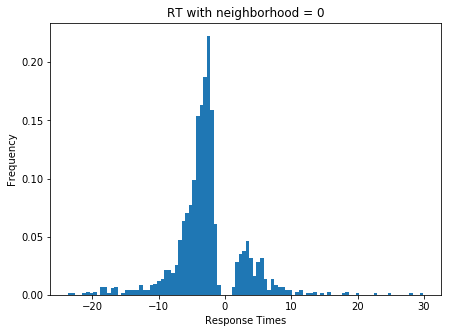

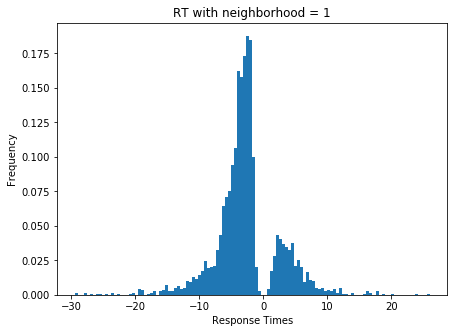

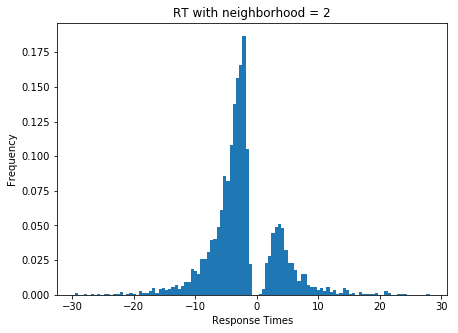

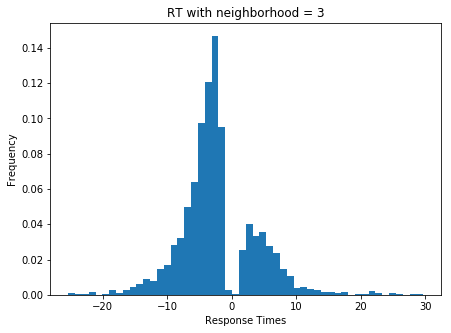

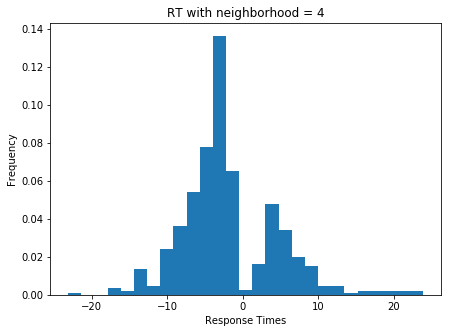

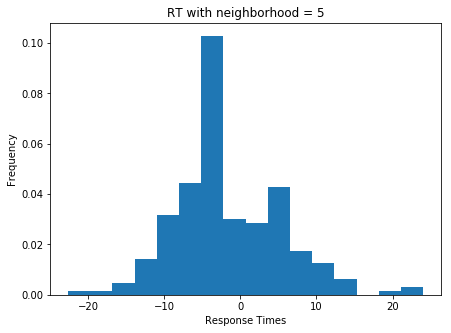

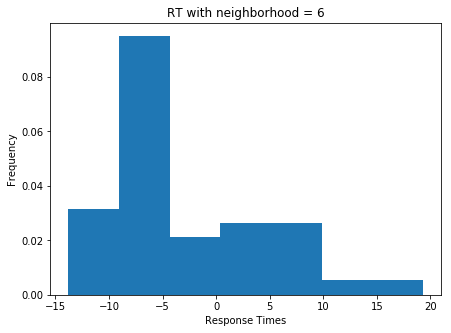

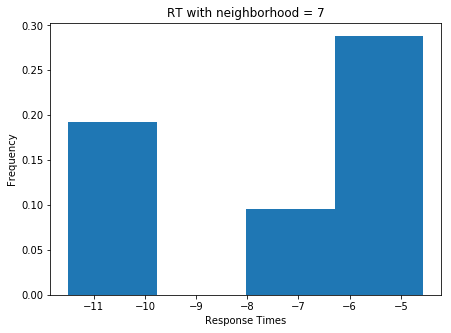

In [191]:
#Reaction times
for c in [0,1,2,3,4,5,6,7]:
    plt.figure(figsize = (7,5))
    plt.hist(data2.loc[data2.context == c].rt, density = True, bins = "auto")
    plt.xlabel("Response Times")
    plt.ylabel("Frequency")
    plt.title("RT with neighborhood = %d" % c)
    plt.show()

In [193]:
#Round analysis for each parameter of the DDM
data2.context.value_counts()

2.0    2867
1.0    2621
3.0    1776
0.0    1375
4.0     635
5.0     217
6.0      40
7.0       6
Name: context, dtype: int64

In [194]:
#Grouped contexts: Low cooperation 0:1 Medium: 2:3 and High: 4 to 7
#This wat we can have more rounds per context and it's easier to interpret.

groups = [1,3,7]
modeler = ddm.HDDMmodelMaker()
st = time.time()
rounds = range(1, 48)
roundsDf = pd.DataFrame()
#data["round"]  = pd.to_numeric(data["round"])
gPrev = -1
for g in groups:
    df = data2.loc[(data2["context"]<=g) & (data2["context"] > gPrev)]
    gPrev = g
    first = True
    for r in df["round"].unique():
        try:
            model = modeler.fit_model(df.loc[(df["round"] == r)], 5000, 200)
            print("\nModel: %s, round %d, time: %f\n" % (g, r, time.time() - st))
            modStats = modeler.get_stats(model)
            modStats["round"] = r
            if first:
                roundsDf = modStats
                first = False
            else:
                roundsDf = roundsDf.append(modStats, ignore_index = True)
            if r%10 == 0:
                roundsDf.to_csv("./output/grouped2_%s_rounds.csv" % (g))
        except: continue
    roundsDf.to_csv("./output/grouped2_%s_rounds.csv" % (g))

 [-----------------100%-----------------] 5000 of 5000 complete in 9.8 sec
Model: 1, round 12, time: 9.854439

 [-----------------100%-----------------] 5000 of 5000 complete in 10.4 sec
Model: 1, round 18, time: 20.623322

 [-----------------100%-----------------] 5000 of 5000 complete in 9.2 sec
Model: 1, round 22, time: 30.128013

 [-----------------100%-----------------] 5000 of 5000 complete in 9.2 sec
Model: 1, round 23, time: 39.692736

 [-----------------100%-----------------] 5000 of 5000 complete in 9.1 sec
Model: 1, round 25, time: 49.171539

 [-----------------100%-----------------] 5000 of 5000 complete in 9.5 sec
Model: 1, round 31, time: 59.042215

 [-----------------100%-----------------] 5000 of 5000 complete in 9.0 sec
Model: 1, round 32, time: 68.368987

 [-----------------100%-----------------] 5000 of 5000 complete in 9.0 sec
Model: 1, round 33, time: 77.746057

 [-----------------100%-----------------] 5000 of 5000 complete in 8.6 sec
Model: 1, round 37, time: 86.

 [-----------------100%-----------------] 5000 of 5000 complete in 12.2 sec
Model: 7, round 31, time: 1446.722559

 [-----------------100%-----------------] 5000 of 5000 complete in 11.3 sec
Model: 7, round 32, time: 1458.384974

 [-----------------100%-----------------] 5000 of 5000 complete in 11.4 sec
Model: 7, round 33, time: 1470.160852

 [-----------------100%-----------------] 5000 of 5000 complete in 12.4 sec
Model: 7, round 35, time: 1483.016948

 [-----------------100%-----------------] 5000 of 5000 complete in 10.4 sec
Model: 7, round 36, time: 1493.860088

 [-----------------100%-----------------] 5000 of 5000 complete in 13.5 sec
Model: 7, round 38, time: 1507.782871

 [-----------------100%-----------------] 5000 of 5000 complete in 10.7 sec
Model: 7, round 39, time: 1518.881085

 [-----------------100%-----------------] 5000 of 5000 complete in 12.8 sec
Model: 7, round 40, time: 1532.014036

 [-----------------100%-----------------] 5000 of 5000 complete in 12.5 sec
Mode

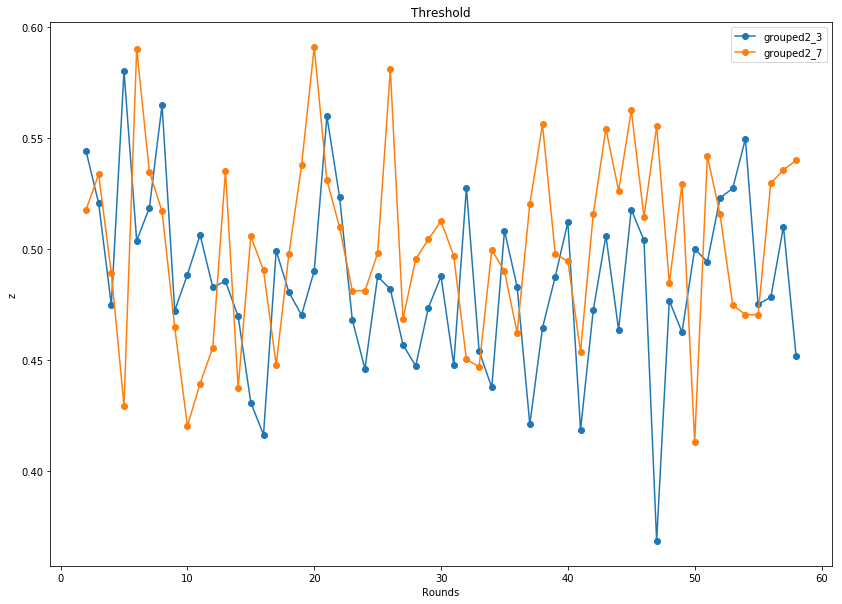

In [199]:
plot_rounds_context(["grouped2_3","grouped2_7"], "z", "Threshold")

Text(0.5,1,'Cooperation rate by context group')

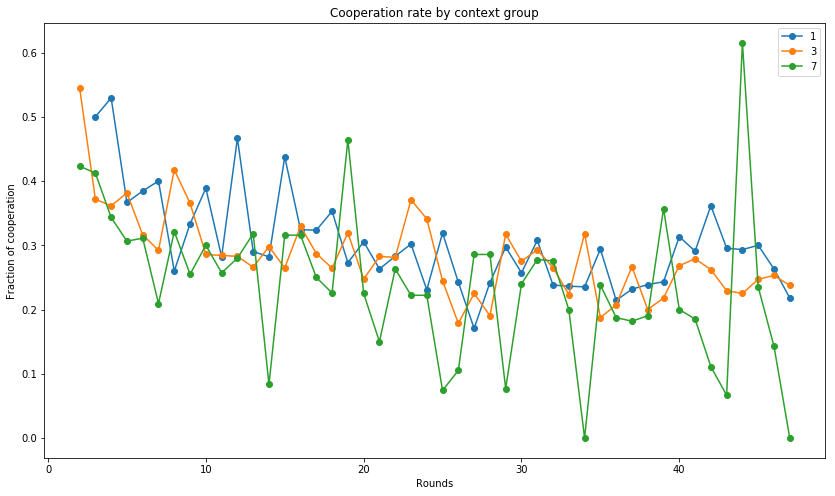

In [171]:
rounds = range(1, data1["round"].max() + 1) # rounds for plotting
plt.figure(figsize = (14,8))
contexts = [1,3,7]
cPrev = -1
for c in contexts:
    coop_rate = []
    for r in rounds:
        n = 0.0
        coop = 0.0
        for i, x in data1.loc[(data1["round"] == r) & (data1["context"] <= c) & (data1["context"] > cPrev)].iterrows():
            n += 1
            if x["response"] == 1.0:
                coop +=1
        if n>1: coop_rate.append(float(coop/n))
        else: coop_rate.append(None)
    cPrev = c
    plt.plot(rounds, coop_rate,"-o", label = c)
plt.xlabel("Rounds")
plt.ylabel("Fraction of cooperation")
plt.legend(loc = "best")
plt.title("Cooperation rate by context group")

In [175]:
#Now the same with the other dataset 

,userid,rt,response,round
0,9,-4.4802,0.0,1
1,18,9.4723,1.0,1
2,7,2.2382,1.0,1
3,10,8.1337,1.0,1
4,13,5.0985,1.0,1
5,5,3.1293,1.0,1
6,15,-3.5873,0.0,1
7,16,4.0431,1.0,1
8,12,-4.7660,0.0,1
9,6,5.9619,1.0,1
